# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_list = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speed = []
countries = []

# set initial count quantities for organization
count = 0
sets = 1

# loops for creating dataframe columns
print("Beginning Data Retrieval\n------------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        if count > 48:
            count = 1
            sets += 1
            city_list.append(city)
        else:
            count += 1
            city_list.append(city)
        print(f"Processing Record {count} of Set {sets} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | broome
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | vilya
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | taltal
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | mayo
Processing Record 10 of Set 1 | zgierz
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | aksay
Processing Record 13 of Set 1 | hami
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | bengkulu
Processing Record 18 of Set 1 | pangnirtung
Processing Record 19 of Set 1 | talnakh
City not found. Skipping...
Processing Record 20 of Set 1 | rosario
Processing Record 21 of Set 1 | saldanha
City not found. Skipping...
Processing Record 22 of Set 1 | tabou
Proc

Processing Record 37 of Set 4 | lasa
Processing Record 38 of Set 4 | nakanojo
City not found. Skipping...
Processing Record 39 of Set 4 | santa rita
Processing Record 40 of Set 4 | tautira
Processing Record 41 of Set 4 | athens
City not found. Skipping...
Processing Record 42 of Set 4 | lagoa
Processing Record 43 of Set 4 | omidiyeh
Processing Record 44 of Set 4 | mezen
Processing Record 45 of Set 4 | sorland
Processing Record 46 of Set 4 | sola
Processing Record 47 of Set 4 | hambantota
Processing Record 48 of Set 4 | nizhneangarsk
Processing Record 49 of Set 4 | mitu
Processing Record 1 of Set 5 | luoyang
Processing Record 2 of Set 5 | quelimane
Processing Record 3 of Set 5 | prikubanskiy
Processing Record 4 of Set 5 | naze
Processing Record 5 of Set 5 | kenai
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 5 | maniitsoq
Processing Record 7 of Set 5 | bajo baudo
Processing Record 8 of Set 5 | harrisburg
Processing Record 9 of Set 5 | bowen
Processin

Processing Record 29 of Set 8 | ilinskiy
Processing Record 30 of Set 8 | harper
City not found. Skipping...
Processing Record 31 of Set 8 | gualaquiza
Processing Record 32 of Set 8 | karratha
Processing Record 33 of Set 8 | jangaon
Processing Record 34 of Set 8 | lavrentiya
Processing Record 35 of Set 8 | tabuk
Processing Record 36 of Set 8 | bethel
Processing Record 37 of Set 8 | coihaique
Processing Record 38 of Set 8 | kilindoni
Processing Record 39 of Set 8 | mount gambier
Processing Record 40 of Set 8 | muros
Processing Record 41 of Set 8 | gloucester
Processing Record 42 of Set 8 | anta
Processing Record 43 of Set 8 | coria
Processing Record 44 of Set 8 | agar
Processing Record 45 of Set 8 | jiwani
Processing Record 46 of Set 8 | jibuti
Processing Record 47 of Set 8 | nianzishan
Processing Record 48 of Set 8 | mering
Processing Record 49 of Set 8 | half moon bay
City not found. Skipping...
Processing Record 1 of Set 9 | atyrau
Processing Record 2 of Set 9 | balikpapan
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({
    "City":city_list,
    "Cloudiness":cloudiness,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speed
})

weather_df.to_csv("output_data/cities.csv", index=False)

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,broome,90,US,1619332671,57,42.2506,-75.8330,50.00,4.61
1,rikitea,100,PF,1619332672,75,-23.1203,-134.9692,78.62,11.16
2,vilya,95,RU,1619332672,70,55.2456,42.2089,41.50,17.90
3,albany,100,US,1619332673,50,42.6001,-73.9662,51.01,1.45
4,ushuaia,0,AR,1619332674,70,-54.8000,-68.3000,44.60,8.05


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
test_stats = weather_df.loc[weather_df['Humidity']>100]
test_stats

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [7]:
print("There are no cities with a humidity greater than 100%")

There are no cities with a humidity greater than 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

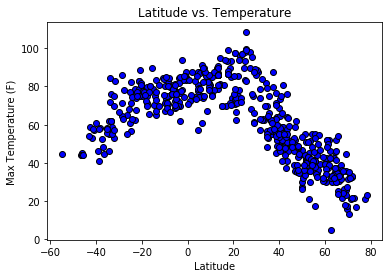

In [8]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], facecolors="blue", edgecolors="black")
plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

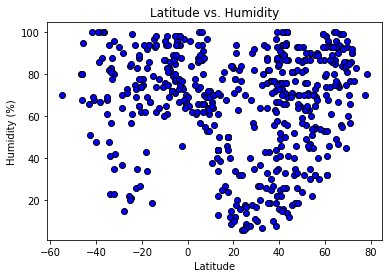

In [9]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="blue")
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

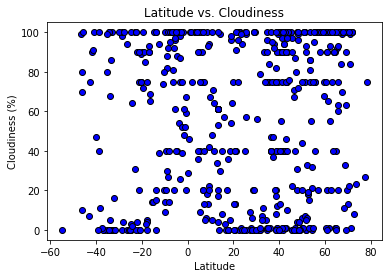

In [10]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

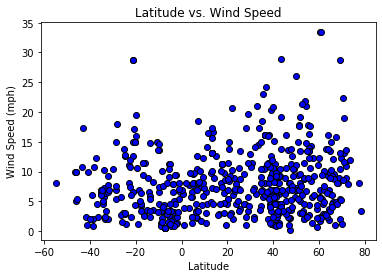

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

In [15]:
north_hem = weather_df.loc[weather_df["Lat"] >= 0]
south_hem = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

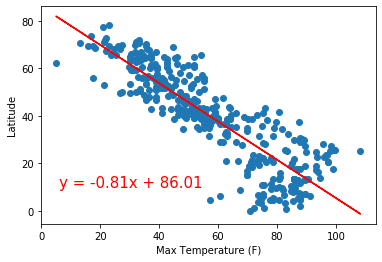

In [16]:
x_values = north_hem['Max Temp']
y_values = north_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

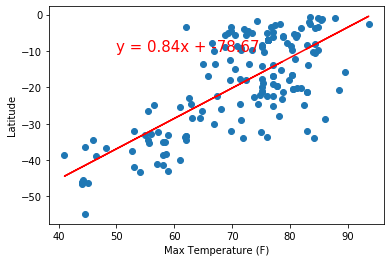

In [17]:
x_values = south_hem['Max Temp'] 
y_values = south_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,-10),fontsize=15,color="red")
plt.xlabel('Max Temperature (F)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

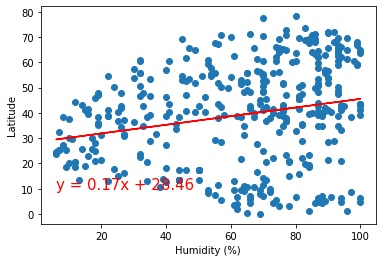

In [18]:
x_values = north_hem['Humidity'] 
y_values = north_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

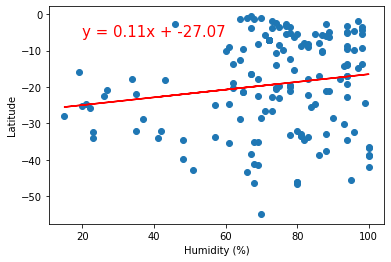

In [19]:
x_values = south_hem['Humidity'] 
y_values = south_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-6),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

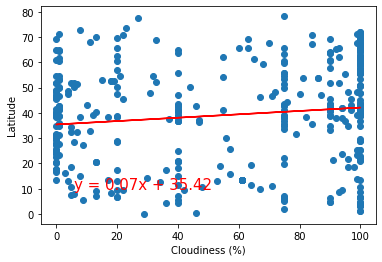

In [20]:
x_values = north_hem['Cloudiness'] 
y_values = north_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

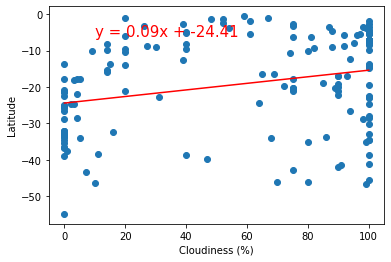

In [21]:
x_values = south_hem['Cloudiness'] 
y_values = south_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-6),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

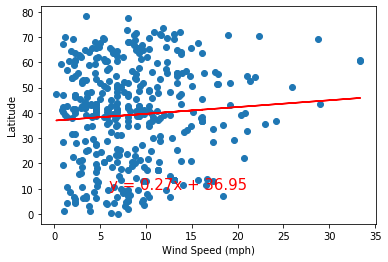

In [22]:
x_values = north_hem['Wind Speed'] 
y_values = north_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

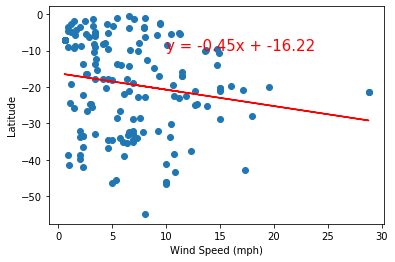

In [23]:
x_values = south_hem['Wind Speed'] 
y_values = south_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.show()

In [24]:
# Observations
# 1
# The closer the dataset gets to the equator, the higher the temperature is, which implies a warmer climate.
# 2
# There seems to be a correlation between latitude and wind speed, as in the northern hemisphere, the greater the 
# latitude the faster the wind speed. The inverse is true for the southern hemisphere.
# 3
# There does not seem to be a strong relationship between cloudiness and latitude. 